In [2]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl.metadata (3.5 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hp\\anaconda3\\Lib\\site-packages\\wordcloud\\query_integral_image.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Using cached wordcloud-1.9.4-cp38-cp38-win_amd64.whl (300 kB)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import re 
import nltk #natural lng tool kit
from nltk.corpus import stopwords #corpus- complte review
from nltk.tokenize import sent_tokenize,word_tokenize #it will split sentence by sentence
from nltk.stem import WordNetLemmatizer # it will give meaning root word with dctionary
from nltk.sentiment.vader import SentimentIntensityAnalyzer#Sentument -some word negtive s
from wordcloud import WordCloud
nltk.download("punkt") #need for tokenzation ..abbrebation read adj etc
nltk.download("stopwords") #is am are and but a an the
nltk.download('vader_lexicon') #categorize postive and negative words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
#open and read speech text file 
file_path = "PMSPEECH.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech_textH = file.read()


In [5]:
speech_textH

'सदियों की प्रतिक्षा के बाद हमारे राम आ गए हैं। सदियों का अभूतपूर्व, धैर्य, अनगिनत, बलिदान, त्याग और तपस्या के बाद हमारे प्रभु राम आ गए है। इस शुभ गड़ी की आप सभी को समस्त। देशवासियों को बहुत बहुत बधाई। हमारे रामलला अब टेंट में नहीं रहेंगे। हमारे रामलला अभी दिव्य मंदिर में रहेंगे। मेरा पक्का विश्वास है, अपार श्रद्धा है कि जो गठित हुआ है, इसकी अनुभूति देश के विश्व के कोने कोने में, राम भक्तों को हो रही होगी। ये अलौकिक है, ये पल पवित्रतम है, ये माहौल, यह वातावरण, ये उर्जा, ये घड़ी प्रभु श्री राम का, हम सब पर आशीर्वाद है। 22 जनवरी 2024 का ये सूरज 1 अद्भुत आभा लेकर आया है। 22 जनवरी 2024, ये कैलेंडर पर लिखी। 1 तारीख नहीं, ये 1 नए काल चक्कर का उद्गम है। मैं आज प्रभु श्रीराम से मा याचना भी करता हूँ। हमारे पुरुषार्थ, हमारे त्याग, तपस्या में कुछ तो कमी रह गई होगी, की हम इतनी सदियों तक ये कार्य कर नहीं पाये। आज बो कमी पूरी हुई है। मुझे विश्वास है प्रभु राम, आज हमें अवश्य क्षमा करेंगे। संविधान के अस्तित्व में आने के बाद भी दशकों तक प्रभु श्रीराम के अस्तित्व को लेकर कानूनी लड़ाई चली। मैं आभार व्यक्त 

In [6]:
#open and read speech text file 
file_path = "PMSPEECH_english.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech_textE = file.read()


In [7]:
speech_textE

"Our Ram has come after centuries of reply.Our Lord Ram has come after the unprecedented, patience, countless, sacrifice, sacrifice and penance of centuries.All of you all.Many congratulations to the countrymen.Our Ramlala will no longer live in the tent.Our Ramlala will stay in the divine temple right now.I have sure belief, it is immense reverence that what has been formed, it must be realized in the corner of the world, Ram devotees.This is supernatural, this moment is the highest, this atmosphere, this atmosphere, this energy, this clock of Lord Shri Ram, is a blessing on all of us.This sun of 22 January 2024 has brought 1 amazing aura.22 January 2024, written on the calendar.Not 1 date, these 1 new period is the origin of the affair.I also plead with Lord Shri Ram today.There must have been some lack of our efforts, our sacrifice, penance, that we could not do this work for so many centuries.Today the boat has been fulfilled.I believe Lord Ram, will definitely forgive us today.Eve

In [8]:
import re

In [9]:
clean_text=re.sub(r'\u200b','',speech_textE)

In [10]:
clean_text

"Our Ram has come after centuries of reply.Our Lord Ram has come after the unprecedented, patience, countless, sacrifice, sacrifice and penance of centuries.All of you all.Many congratulations to the countrymen.Our Ramlala will no longer live in the tent.Our Ramlala will stay in the divine temple right now.I have sure belief, it is immense reverence that what has been formed, it must be realized in the corner of the world, Ram devotees.This is supernatural, this moment is the highest, this atmosphere, this atmosphere, this energy, this clock of Lord Shri Ram, is a blessing on all of us.This sun of 22 January 2024 has brought 1 amazing aura.22 January 2024, written on the calendar.Not 1 date, these 1 new period is the origin of the affair.I also plead with Lord Shri Ram today.There must have been some lack of our efforts, our sacrifice, penance, that we could not do this work for so many centuries.Today the boat has been fulfilled.I believe Lord Ram, will definitely forgive us today.Eve

### Text preprocessing

In [11]:
cleaned_text= clean_text.lower()                  # converting to lower case

In [12]:
import string                                    # removing all punctuations from text  
for i in cleaned_text:
    if i in string.punctuation:
        cleaned_text=cleaned_text.replace(i,'')
cleaned_text

'our ram has come after centuries of replyour lord ram has come after the unprecedented patience countless sacrifice sacrifice and penance of centuriesall of you allmany congratulations to the countrymenour ramlala will no longer live in the tentour ramlala will stay in the divine temple right nowi have sure belief it is immense reverence that what has been formed it must be realized in the corner of the world ram devoteesthis is supernatural this moment is the highest this atmosphere this atmosphere this energy this clock of lord shri ram is a blessing on all of usthis sun of 22 january 2024 has brought 1 amazing aura22 january 2024 written on the calendarnot 1 date these 1 new period is the origin of the affairi also plead with lord shri ram todaythere must have been some lack of our efforts our sacrifice penance that we could not do this work for so many centuriestoday the boat has been fulfilledi believe lord ram will definitely forgive us todayeven after the constitution came into

In [13]:
words = word_tokenize(cleaned_text)                 #converting whole text to words and removig stopwords
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['ram',
 'come',
 'centuries',
 'replyour',
 'lord',
 'ram',
 'come',
 'unprecedented',
 'patience',
 'countless',
 'sacrifice',
 'sacrifice',
 'penance',
 'centuriesall',
 'allmany',
 'congratulations',
 'countrymenour',
 'ramlala',
 'longer',
 'live',
 'tentour',
 'ramlala',
 'stay',
 'divine',
 'temple',
 'right',
 'nowi',
 'sure',
 'belief',
 'immense',
 'reverence',
 'formed',
 'must',
 'realized',
 'corner',
 'world',
 'ram',
 'devoteesthis',
 'supernatural',
 'moment',
 'highest',
 'atmosphere',
 'atmosphere',
 'energy',
 'clock',
 'lord',
 'shri',
 'ram',
 'blessing',
 'usthis',
 'sun',
 '22',
 'january',
 '2024',
 'brought',
 '1',
 'amazing',
 'aura22',
 'january',
 '2024',
 'written',
 'calendarnot',
 '1',
 'date',
 '1',
 'new',
 'period',
 'origin',
 'affairi',
 'also',
 'plead',
 'lord',
 'shri',
 'ram',
 'todaythere',
 'must',
 'lack',
 'efforts',
 'sacrifice',
 'penance',
 'could',
 'work',
 'many',
 'centuriestoday',
 'boat',
 'fulfilledi',
 'believe',
 'lord',
 'ram',
 

In [14]:
# Lemmatization           
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['ram',
 'come',
 'century',
 'replyour',
 'lord',
 'ram',
 'come',
 'unprecedented',
 'patience',
 'countless',
 'sacrifice',
 'sacrifice',
 'penance',
 'centuriesall',
 'allmany',
 'congratulation',
 'countrymenour',
 'ramlala',
 'longer',
 'live',
 'tentour',
 'ramlala',
 'stay',
 'divine',
 'temple',
 'right',
 'nowi',
 'sure',
 'belief',
 'immense',
 'reverence',
 'formed',
 'must',
 'realized',
 'corner',
 'world',
 'ram',
 'devoteesthis',
 'supernatural',
 'moment',
 'highest',
 'atmosphere',
 'atmosphere',
 'energy',
 'clock',
 'lord',
 'shri',
 'ram',
 'blessing',
 'usthis',
 'sun',
 '22',
 'january',
 '2024',
 'brought',
 '1',
 'amazing',
 'aura22',
 'january',
 '2024',
 'written',
 'calendarnot',
 '1',
 'date',
 '1',
 'new',
 'period',
 'origin',
 'affairi',
 'also',
 'plead',
 'lord',
 'shri',
 'ram',
 'todaythere',
 'must',
 'lack',
 'effort',
 'sacrifice',
 'penance',
 'could',
 'work',
 'many',
 'centuriestoday',
 'boat',
 'fulfilledi',
 'believe',
 'lord',
 'ram',
 'def

### Sentiment analysis

In [32]:
sia = SentimentIntensityAnalyzer() # performing sentiment analyis using sentiment analysis tool
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
print('average sentiment of the speech:',average_sentiment)

average sentiment of the speech: 0.03275327868852458


In [16]:
len(sentiment_scores)

488

In [17]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >=-0.1 and
                sentiment_scores[i] <= 0.1]

In [18]:
print("The postive words are :", positive_words)

The postive words are : ['congratulations', 'divine', 'sure', 'energy', 'blessing', 'amazing', 'definitely', 'forgive', 'legal', 'justice', 'justice', 'festivals', 'celebrating', 'blessings', 'feeling', 'faith', 'good', 'opportunity', 'festival', 'peace', 'harmony', 'giving', 'giving', 'inspiration', 'bright', 'energy', 'festival', 'vision', 'faith', 'glory', 'faith', 'grand', 'gods', 'gods', 'bless', 'like', 'feeling', 'pleasant', 'create', 'creation', 'capable', 'competent', 'grand', 'divine', 'well']


In [19]:
print("The negative_words are :", negative_words)

The negative_words are : ['lack', 'battle', 'fire', 'fire', 'fire', 'dispute']


In [20]:
print("The neutral_words are :", neutral_words)

The neutral_words are : ['ram', 'come', 'centuries', 'replyour', 'lord', 'ram', 'come', 'unprecedented', 'patience', 'countless', 'sacrifice', 'sacrifice', 'penance', 'centuriesall', 'allmany', 'countrymenour', 'ramlala', 'longer', 'live', 'tentour', 'ramlala', 'stay', 'temple', 'right', 'nowi', 'belief', 'immense', 'reverence', 'formed', 'must', 'realized', 'corner', 'world', 'ram', 'devoteesthis', 'supernatural', 'moment', 'highest', 'atmosphere', 'atmosphere', 'clock', 'lord', 'shri', 'ram', 'usthis', 'sun', '22', 'january', '2024', 'brought', '1', 'aura22', 'january', '2024', 'written', 'calendarnot', '1', 'date', '1', 'new', 'period', 'origin', 'affairi', 'also', 'plead', 'lord', 'shri', 'ram', 'todaythere', 'must', 'efforts', 'sacrifice', 'penance', 'could', 'work', 'many', 'centuriestoday', 'boat', 'fulfilledi', 'believe', 'lord', 'ram', 'us', 'todayeven', 'constitution', 'came', 'existence', 'started', 'existence', 'lord', 'shri', 'ram', 'decadesi', 'express', 'gratitudethe', '

In [21]:
word_freq_postive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_postive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 35 samples and 45 outcomes>
<FreqDist with 4 samples and 6 outcomes>
<FreqDist with 282 samples and 437 outcomes>


In [23]:
df_positive = pd.DataFrame(word_freq_postive.most_common(10), columns=['Word','Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(10), columns=['Word','Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(10), columns=['Word','Frequency'])

In [24]:
df_positive.head()  # most frequently used top 5 positive words

,Word,Frequency
0,faith,3
1,divine,2
2,energy,2
3,justice,2
4,feeling,2


In [34]:
df_negative.head(4)    # most frequently used top 4 negative words

,Word,Frequency
0,fire,3
1,lack,1
2,battle,1
3,dispute,1


In [26]:
df_neutral.head(3)     # most frequently used top 3 neutral words

,Word,Frequency
0,ram,32
1,temple,15
2,india,12


### Visualization

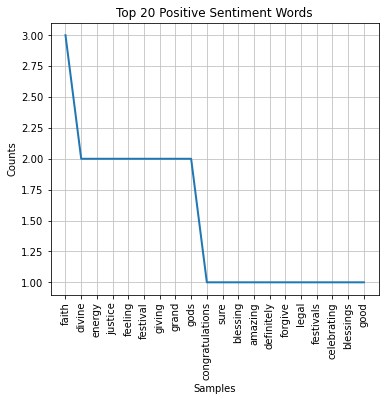

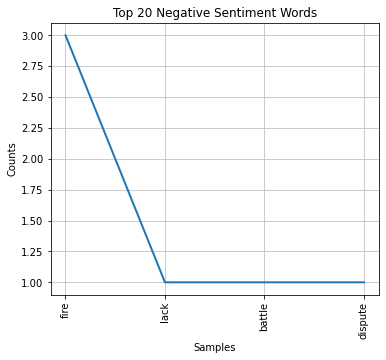

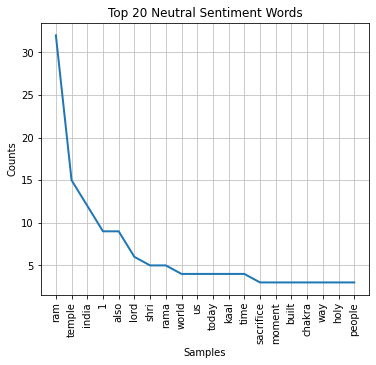

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(131)
word_freq_postive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(20,5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(20,5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [27]:
wordcloud_postive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_postive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

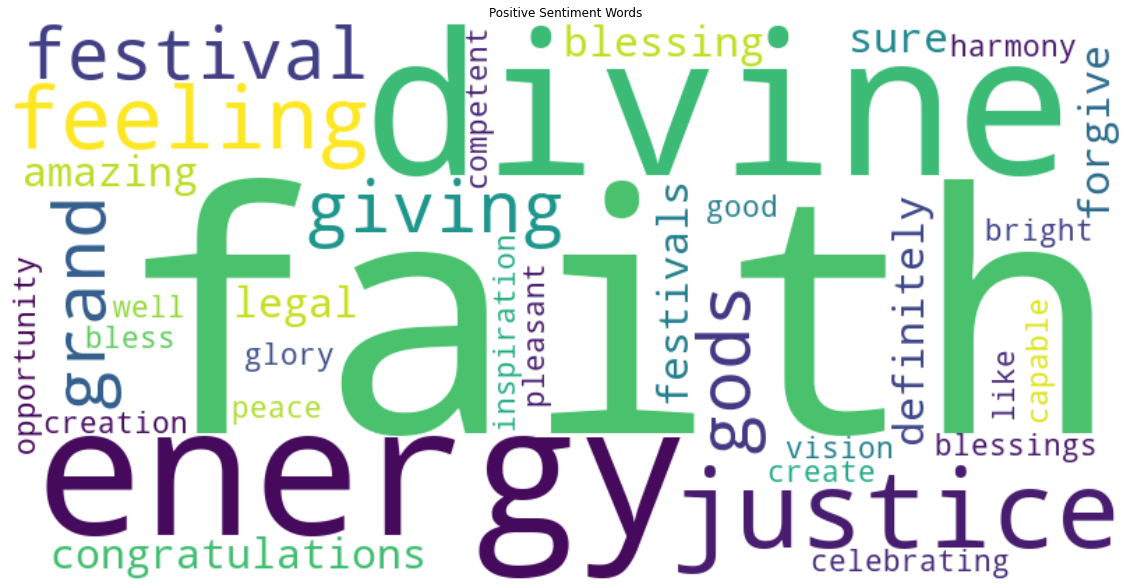

In [28]:
plt.figure(figsize=(20,12))

plt.imshow(wordcloud_postive, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")
plt.show()

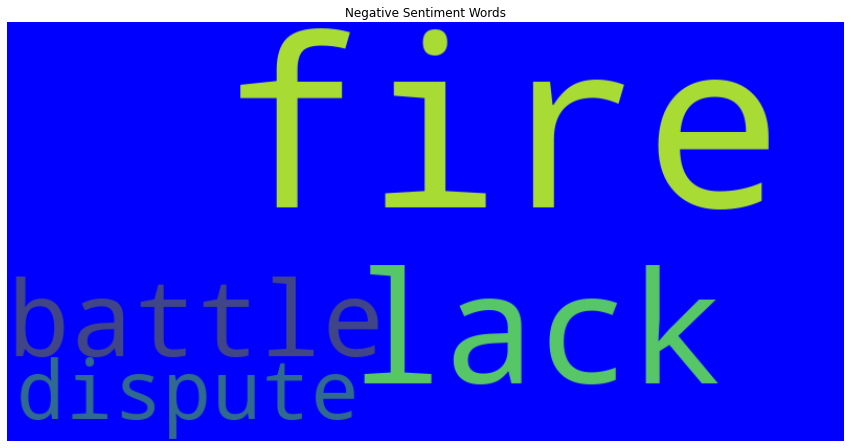

In [29]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

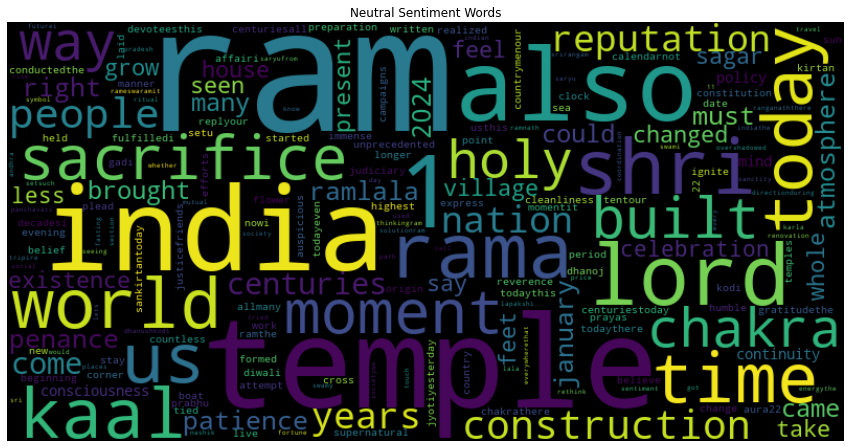

In [30]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.show()